***Importing required libraries.***

In [0]:
import pandas as pd
import numpy as np
from google.colab import files

In [2]:
uploaded = files.upload()

Saving Position_Salaries.csv to Position_Salaries (1).csv


***Import dataset and print it.***

In [3]:
import io

dataset = pd.read_csv(io.StringIO(uploaded['Position_Salaries.csv'].decode('utf-8')))
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2: ].values

print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


# ***Building the Random Forest Regressor***

***Importing model and training it.***

In [9]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators = 300 , random_state = 0)
reg = reg.fit(x , y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


***Make predictions.***

In [10]:
predictions = reg.predict(6.5)
print(predictions)

[160333.33333333]


# ***Visualising the data.***

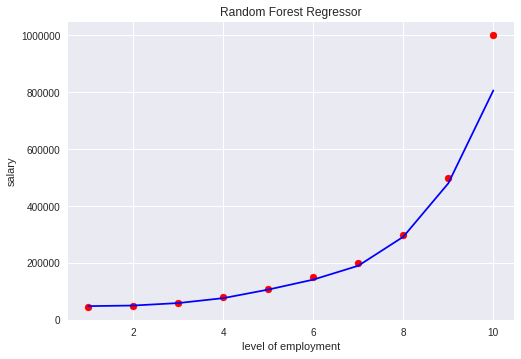

In [11]:
import matplotlib.pyplot as plt

plt.scatter(x , y , color = 'red')
plt.plot(x , reg.predict(x) , color = 'blue')
plt.title('Random Forest Regressor')
plt.xlabel('level of employment')
plt.ylabel('salary')
plt.show()

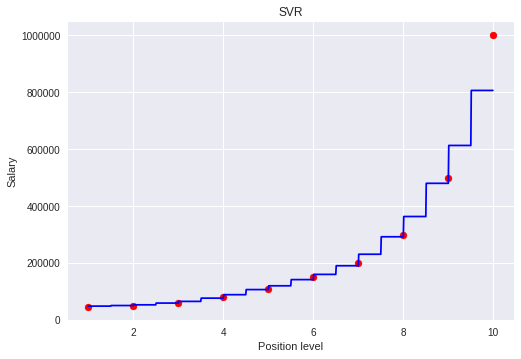

In [12]:
# Visualising the RFR results (for higher resolution and smoother curve)

x_grid = np.arange(min(x), max(x), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, reg.predict(x_grid), color = 'blue')
plt.title('SVR')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()